In [1]:
from transformers import pipeline

import os
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image,ImageFilter

In [258]:
#these codes are used to loop through the directory
#path_images = 'rs19_val/jpgs/rs19_val/'
path_images_org=  'rs19_val/jpgs/rs19_val/'
path_images = 'rs19_val/960_512/images_resized/'
path_masks_org = 'rs19_val/uint8/rs19_val/'
path_masks = 'rs19_val/960_512/masks_resized_track/'


In [20]:
tram_track=3 # label for tram-track
rail_track=12
track_bed= 15
rail_raised= 17
rail_embedded =18
veg = 8

In [3]:
file='rs01341'

In [17]:
image= cv2.imread(path_images+file+'.jpg.jpg',1)
org_mask=cv2.imread(path_masks_org+file+'.png',0)
final_mask = cv2.imread(path_masks+file+'.png.png',0)


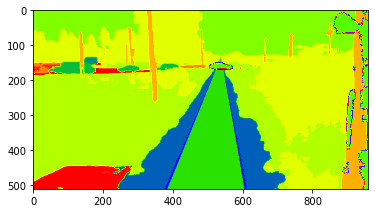

In [44]:
down_width = 960
down_height = 512
down_points = (down_width, down_height)
org_mask=cv2.medianBlur(org_mask, 3)
org_mask=cv2.resize(org_mask, down_points, interpolation= cv2.INTER_NEAREST)
plt.imshow(org_mask,cmap='prism')

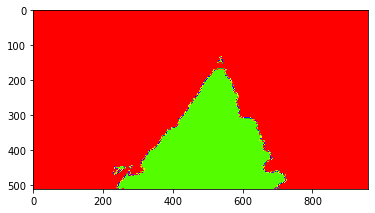

In [45]:
plt.imshow(final_mask,cmap='prism')

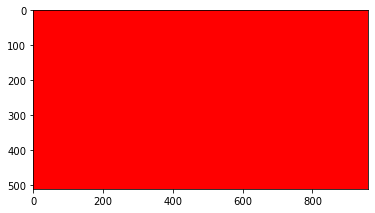

In [46]:
int_mask_tramtrack = org_mask.copy()
int_mask_tramtrack[int_mask_tramtrack != tram_track]=0
int_mask_tramtrack[int_mask_tramtrack == tram_track]=1
plt.imshow(int_mask_tramtrack,cmap='prism')

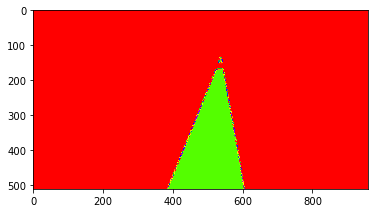

In [47]:
int_mask_railtrack = org_mask.copy()
int_mask_railtrack[int_mask_railtrack != rail_track]=0
int_mask_railtrack[int_mask_railtrack == rail_track]=1
plt.imshow(int_mask_railtrack,cmap='prism')

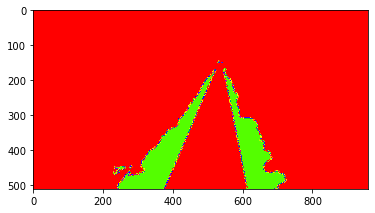

In [48]:
int_mask_trackbed = org_mask.copy()
int_mask_trackbed[int_mask_trackbed != track_bed]=0
int_mask_trackbed[int_mask_trackbed == track_bed]=1
plt.imshow(int_mask_trackbed,cmap='prism')

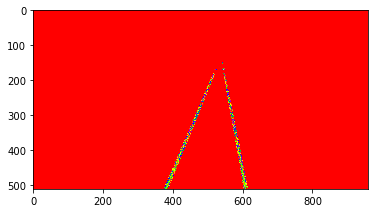

In [49]:
int_mask_railraised = org_mask.copy()
int_mask_railraised[int_mask_railraised != rail_raised]=0
int_mask_railraised[int_mask_railraised== rail_raised]=1
plt.imshow(int_mask_railraised,cmap='prism')

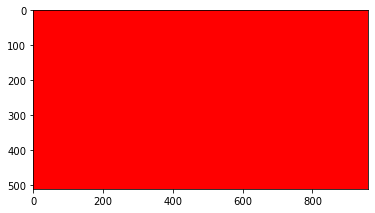

In [50]:
int_mask_railembedded = org_mask.copy()
int_mask_railembedded[int_mask_railembedded != rail_embedded]=0
int_mask_railembedded[int_mask_railembedded== rail_embedded]=1
plt.imshow(int_mask_railembedded,cmap='prism')

In [83]:
file='rs00275'

In [84]:
image= cv2.imread(path_images+file+'.jpg.jpg',1)
org_mask=cv2.imread(path_masks_org+file+'.png',0)
final_mask = cv2.imread(path_masks+file+'.png.png',0)

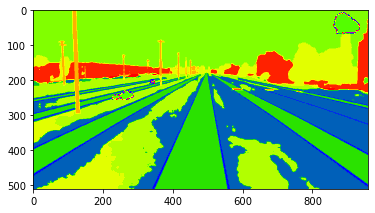

In [85]:
down_width = 960
down_height = 512
down_points = (down_width, down_height)
org_mask=cv2.medianBlur(org_mask, 3)
org_mask=cv2.resize(org_mask, down_points, interpolation= cv2.INTER_NEAREST)
plt.imshow(org_mask,cmap='prism')

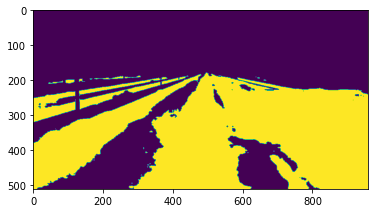

In [86]:
plt.imshow(final_mask)

332


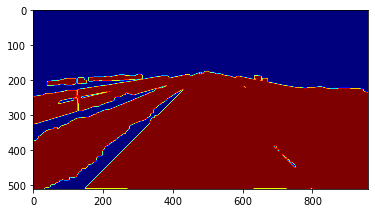

In [89]:

mask= final_mask.copy()
initial_kernel = np.ones((10,10), np.uint8)
img_dilation = cv2.dilate(mask, initial_kernel, iterations=1)

coord = cv2.findNonZero(mask)
length = len(coord) - 1 
coord_width = []
coord_height = []
for k in range(length):
    coord_width.append(coord[:][k][0][0])
    coord_height.append(coord[:][k][0][1])
print(iter)
iter = max(coord_height) - min(coord_height)
highest = min(coord_height)
highest_1 = min(coord_height) + 1 

width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
width_mid = int(width_mid)
width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
width_mid_1 = int(width_mid_1)



for i in range(iter):
    kernel = np.ones((20+i,20+i), np.uint8)
    img_dilation[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

plt.imshow(img_dilation, cmap='jet')


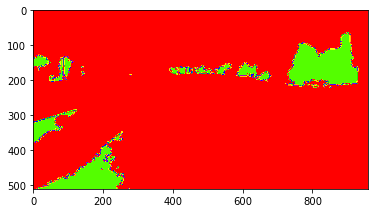

In [90]:
mask_veg = org_mask.copy()
mask_veg[mask_veg != veg]=0
mask_veg[mask_veg== veg]=1
plt.imshow(mask_veg,cmap='prism')

In [92]:
veg_track= img_dilation * mask_veg

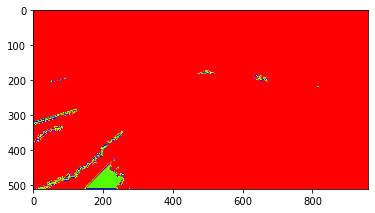

In [93]:
plt.imshow(veg_track,cmap='prism')

# find the coordinates of non-zero pixels in the masks

In [102]:
mask= final_mask.copy()
coord = cv2.findNonZero(mask)

In [114]:
np.set_printoptions(threshold=np.inf)
mask_16=cv2.resize(mask, (16,16), interpolation= cv2.INTER_NEAREST)

In [115]:
np.set_printoptions(threshold=np.inf)
mask_16

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]], dtype=uint8)

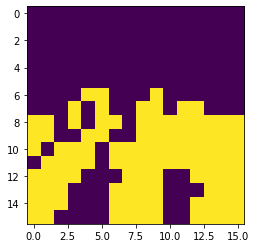

In [118]:
plt.imshow(mask_16)

# fill the masks with 1 if if come between 1s in the image

In [119]:
def forward_fill_ifsame(x):
    # Get mask of non-zeros and then use it to forward-filled indices
    mask = x!=0
    idx = np.where(mask,np.arange(len(x)),0)
    np.maximum.accumulate(idx,axis=0, out=idx)

    # Now we need to work on the additional requirement of filling only
    # if the previous and next ones being same
    # Store a copy as we need to work and change input data
    x1 = x.copy()

    # Get non-zero elements
    xm = x1[mask]

    # Off the selected elements, we need to assign zeros to the previous places
    # that don't have their correspnding next ones different
    xm[:-1][xm[1:] != xm[:-1]] = 0

    # Assign the valid ones to x1. Invalid ones become zero.
    x1[mask] = xm

    # Use idx for indexing to do the forward filling
    out = x1[idx]

    # For the invalid ones, keep the previous masked elements
    out[mask] = x[mask]
    return out

In [121]:
for k,val in enumerate(mask_16):
    mask_16[k]=forward_fill_ifsame(val)
print(mask_16)
    

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]


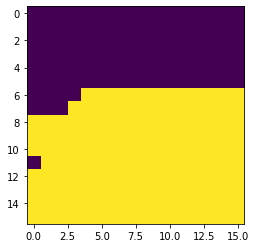

In [122]:
plt.imshow(mask_16)

In [123]:
for k,val in enumerate(mask_32):
    mask_32[k]=forward_fill_ifsame(val)
print(mask_32)
    

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 

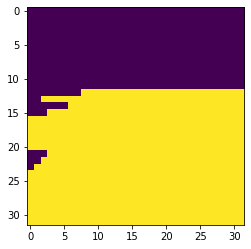

In [124]:
plt.imshow(mask_32)

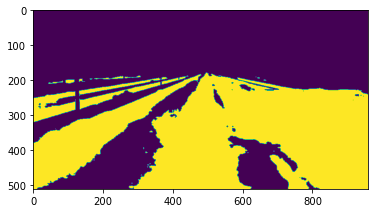

In [125]:
plt.imshow(mask)

In [126]:
for k,val in enumerate(mask):
    mask[k]=forward_fill_ifsame(val)

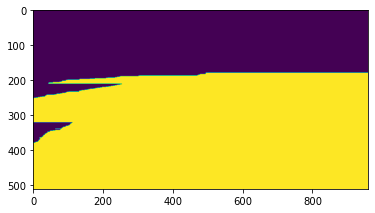

In [127]:
plt.imshow(mask)

In [106]:
counts

array([ 202,  202,  201,  202,  202,  202,  203,  202,  204,  204,  204,
        203,  201,  201,  202,  202,  202,  198,  198,  198,  199,  206,
        210,  209,  210,  210,  211,  211,  210,  211,  211,  211,  211,
        211,  212,  212,  212,  210,  210,  209,  209,  210,  208,  207,
        208,  206,  207,  206,  207,  203,  200,  199,  204,  206,  207,
        207,  207,  210,  208,  207,  203,  204,  204,  203,  204,  203,
        201,  198,  195,  194,  192,  188,  182,  181,  179,  179,  181,
        181,  182,  182,  183,  185,  185,  185,  187,  186,  183,  185,
        185,  187,  186,  185,  188,  195,  198,  199,  197,  196,  194,
        193,  193,  192,  194,  190,  189,  190,  194,  193,  196,  197,
        196,  197,  198,  198,  198,  198,  196,  194,  193,  191,  190,
        175,  148,  147,  147,  147,  145,  145,  144,  143,  144,  143,
        158,  171,  190,  183,  182,  181,  181,  181,  180,  179,  176,
        175,  175,  174,  173,  172,  172,  170,  1

# Function to fill the gap between track lines

In [221]:
def fill_zero_function(arr):
    for i in range(len(arr)):
      # Check if the current element has a previous value of 1 at any previous index
      # or any values after it at any forward index as 1
      if any(arr[:i] == 1) and any(arr[i+1:] == 1):
        # If it does not, replace it with 0
        arr[i] = 1
    return arr

In [198]:
def forward_fill_ifsame(x):
    # Get mask of non-zeros and then use it to forward-filled indices
    mask = x!=0
    idx = np.where(mask,np.arange(len(x)),0)
    np.maximum.accumulate(idx,axis=0, out=idx)
    #np.maximum.accumulate(idx,axis=1, out=idx)

    # Now we need to work on the additional requirement of filling only
    # if the previous and next ones being same
    # Store a copy as we need to work and change input data
    x1 = x.copy()

    # Get non-zero elements
    xm = x1[mask]

    # Off the selected elements, we need to assign zeros to the previous places
    # that don't have their correspnding next ones different
    xm[:-1][xm[1:] != xm[:-1]] = 0

    # Assign the valid ones to x1. Invalid ones become zero.
    x1[mask] = xm

    # Use idx for indexing to do the forward filling
    out = x1[idx]

    # For the invalid ones, keep the previous masked elements
    out[mask] = x[mask]
    return out

# Function to dilate track masks

In [188]:
def dilate_mask(mask_to_be_dilated):
    mask= mask_to_be_dilated.copy()
    initial_kernel = np.ones((10,10), np.uint8)
    img_dilation = cv2.dilate(mask, initial_kernel, iterations=1)

    coord = cv2.findNonZero(mask)
    length = len(coord) - 1 
    coord_width = []
    coord_height = []
    for k in range(length):
        coord_width.append(coord[:][k][0][0])
        coord_height.append(coord[:][k][0][1])
    
    iter = max(coord_height) - min(coord_height)
    highest = min(coord_height)
    highest_1 = min(coord_height) + 1 

    width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
    width_mid = int(width_mid)
    width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
    width_mid_1 = int(width_mid_1)

    for i in range(iter):
        kernel = np.ones((15+i,15+i), np.uint8)
        img_dilation[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

    return img_dilation


# Testing of the code for filling in 1 on different images 

In [128]:
file = 'rs00588'

In [130]:
image= cv2.imread(path_images+file+'.jpg.jpg',1)
org_mask=cv2.imread(path_masks_org+file+'.png',0)
final_mask = cv2.imread(path_masks+file+'.png.png',0)

down_width = 960
down_height = 512
down_points = (down_width, down_height)
org_mask=cv2.medianBlur(org_mask, 3)
org_mask=cv2.resize(org_mask, down_points, interpolation= cv2.INTER_NEAREST)


In [132]:
mask_veg = org_mask.copy()
mask_veg[mask_veg != veg]=0
mask_veg[mask_veg== veg]=1


In [135]:
veg_track= final_mask * mask_veg

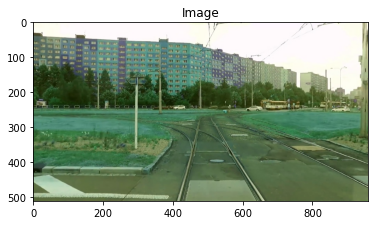

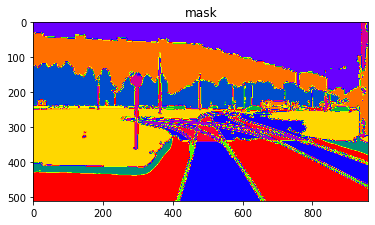

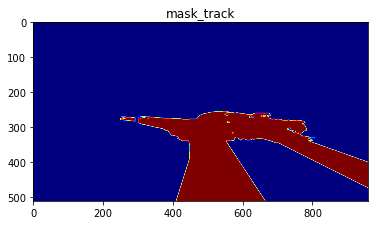

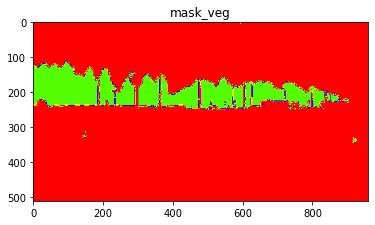

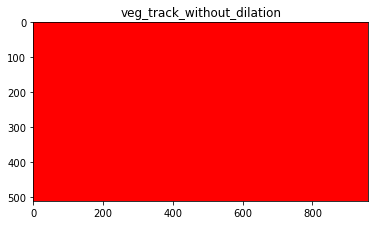

In [144]:
plt.imshow(image)
plt.title('Image')
plt.show()

plt.imshow(org_mask,cmap='prism')
plt.title('mask')
plt.show()

plt.imshow(final_mask,cmap='jet')
plt.title('mask_track')
plt.show()

plt.imshow(mask_veg,cmap='prism')
plt.title('mask_veg')
plt.show()

plt.imshow(veg_track,cmap='prism')
plt.title('veg_track_without_dilation')
plt.show()

In [141]:
track_mask_dilated= dilate_mask(final_mask)

In [166]:
fill_gap_track_dilated= track_mask_dilated.copy()
for k,val in enumerate(fill_gap_track_dilated):
    fill_gap_track_dilated[k]=forward_fill_ifsame(val)

In [167]:
veg_dilated_track= track_mask_dilated*mask_veg

In [168]:
veg_dilated_track_filled=fill_gap_track_dilated*mask_veg

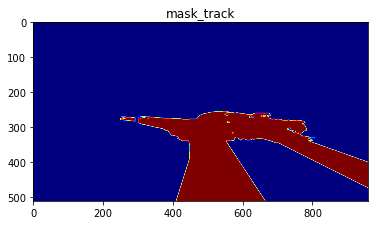

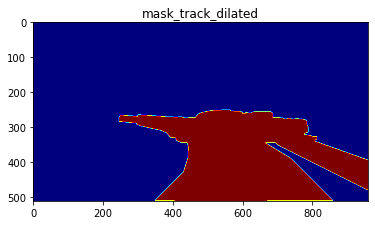

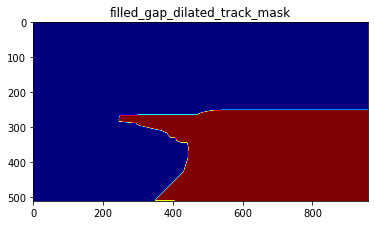

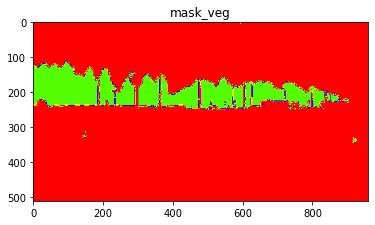

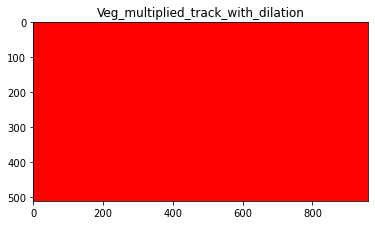

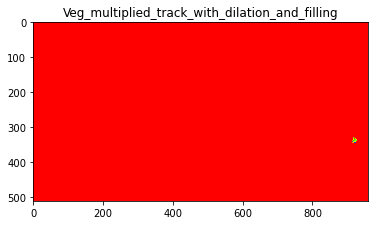

In [169]:
plt.imshow(image)
plt.title('Image')
plt.show()

plt.imshow(org_mask,cmap='prism')
plt.title('mask')
plt.show()

plt.imshow(final_mask,cmap='jet')
plt.title('mask_track')
plt.show()

plt.imshow(track_mask_dilated,cmap='jet')
plt.title('mask_track_dilated')
plt.show()

plt.imshow(fill_gap_track_dilated,cmap='jet')
plt.title('filled_gap_dilated_track_mask')
plt.show()

#plt.imshow(fill_gap_track_nondilated,cmap='jet')
#plt.title('filled_gap_nondilated_track_mask')
#plt.show()

plt.imshow(mask_veg,cmap='prism')
plt.title('mask_veg')
plt.show()

plt.imshow(veg_dilated_track,cmap='prism')
plt.title('Veg_multiplied_track_with_dilation')
plt.show()

plt.imshow(veg_dilated_track_filled,cmap='prism')
plt.title('Veg_multiplied_track_with_dilation_and_filling')
plt.show()

# Function to post proicess file

In [230]:
def post_process(file):
	image= cv2.imread(path_images+file+'.jpg.jpg',1)
	org_mask=cv2.imread(path_masks_org+file+'.png',0)
	final_mask = cv2.imread(path_masks+file+'.png.png',0)

	down_width = 960
	down_height = 512
	down_points = (down_width, down_height)
	org_mask=cv2.medianBlur(org_mask, 3)
	org_mask=cv2.resize(org_mask, down_points, interpolation= cv2.INTER_NEAREST)
	
	plt.imshow(image)
	plt.title('Image')
	plt.show()

	plt.imshow(org_mask,cmap='prism')
	plt.title('mask')
	plt.show()
	

	plt.imshow(final_mask,cmap='jet')
	plt.title('mask_track')
	plt.show()
	

		
	mask_veg = org_mask.copy()
	mask_veg[mask_veg != veg]=0
	mask_veg[mask_veg== veg]=1
	
	track_mask_dilated= dilate_mask(final_mask)
	
	#fill_gap_track_dilated= track_mask_dilated.copy()
	#for k,val in enumerate(fill_gap_track_dilated):
	#	fill_gap_track_dilated[k]=forward_fill_ifsame(val)

	fill_zero= track_mask_dilated.copy()
	for k,val in enumerate(fill_zero):
		fill_zero[k]=fill_zero_function(val)
	
	veg_dilated_track= track_mask_dilated*mask_veg
	
	#veg_dilated_track_filled=fill_gap_track_dilated*mask_veg
	veg_dilated_track_filled=fill_zero*mask_veg

	
	plt.imshow(track_mask_dilated,cmap='jet')
	plt.title('mask_track_dilated')
	plt.show()

	#dilated_img_array= track_mask_dilated.copy()
	#dilated_img_array=cv2.resize(track_mask_dilated,(32,32))
	#np.set_printoptions(threshold=np.inf)

	#print('dilated array',dilated_img_array)
	
	#plt.imshow(fill_gap_track_dilated,cmap='jet')
	#plt.title('filled_gap_dilated_track_mask')
	#plt.show()
	

	#gap_filling_problem=fill_gap_track_dilated.copy()
	#gap_filling_problem=cv2.resize(gap_filling_problem,(32,32),interpolation= cv2.INTER_NEAREST)
	#np.set_printoptions(threshold=np.inf)
    
	#print('Gap_filled_problem', gap_filling_problem)
	
	plt.imshow(fill_zero,cmap='jet')
	plt.title('filled_gap_zero')
	plt.show()
	#gap_zero=fill_zero.copy()
	
	#gap_zero=cv2.resize(gap_zero,(32,32),interpolation= cv2.INTER_NEAREST)
	#np.set_printoptions(threshold=np.inf)
    
	#print('Gap_zero', gap_zero)
	
	plt.imshow(mask_veg,cmap='prism')
	plt.title('mask_veg')
	plt.show()
	
	plt.imshow(veg_dilated_track,cmap='prism')
	plt.title('Veg_multiplied_track_with_dilation')
	plt.show()
	
	plt.imshow(veg_dilated_track_filled,cmap='prism')
	plt.title('Veg_multiplied_track_with_dilation_and_filling')
	plt.show()

In [232]:
#file='rs03635'
file='rs00588'
#file='rs04727'

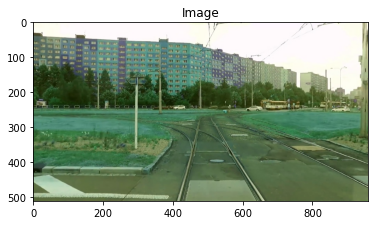

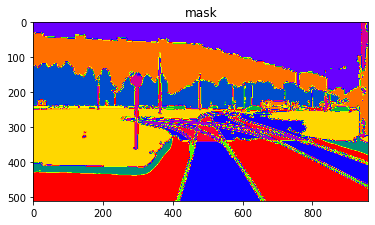

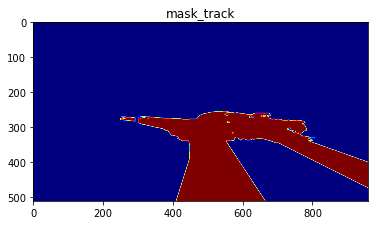

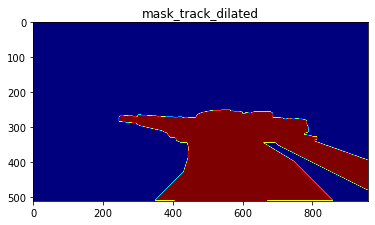

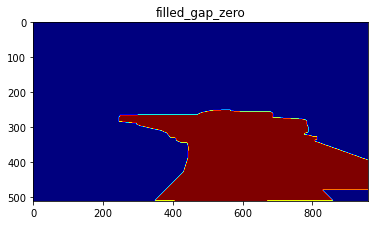

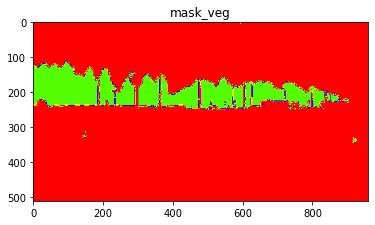

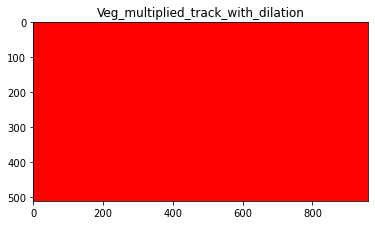

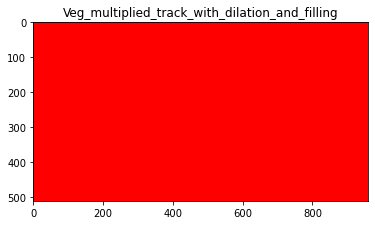

In [233]:
post_process(file)

In [234]:
file ='rs05402'

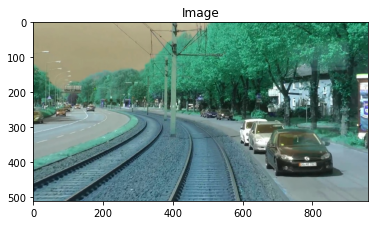

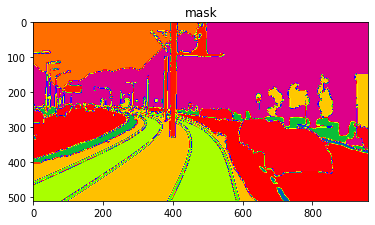

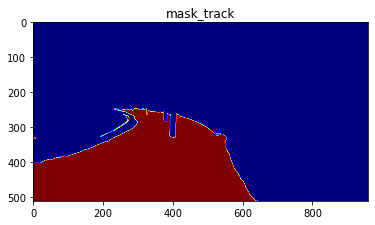

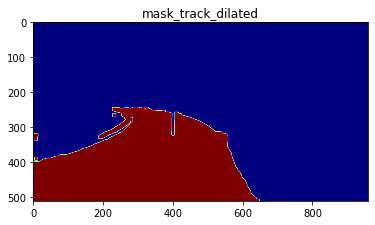

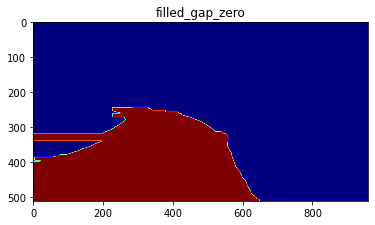

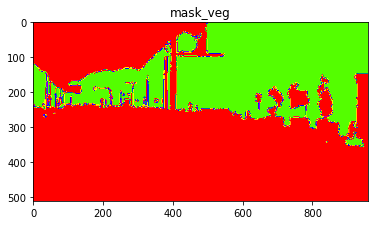

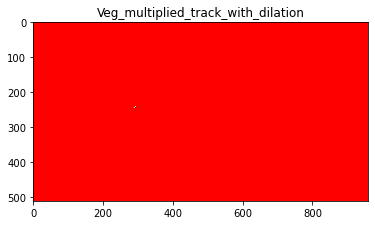

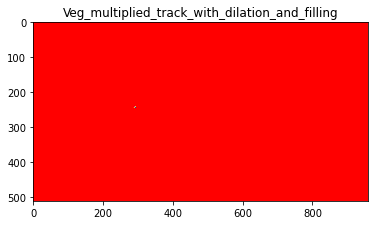

In [235]:
post_process(file)

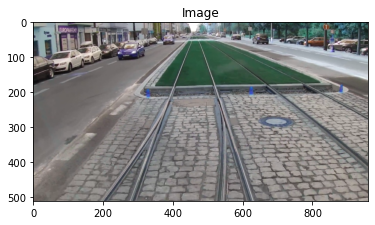

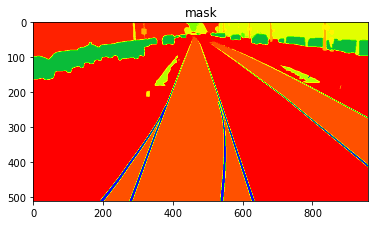

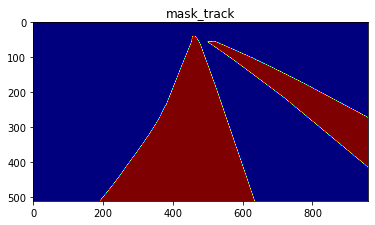

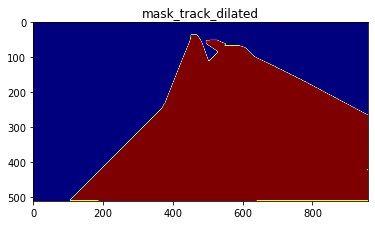

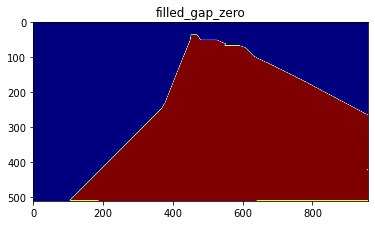

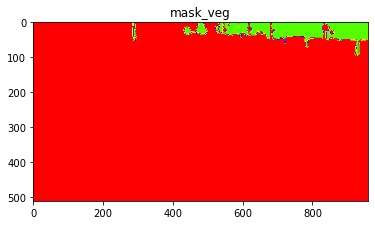

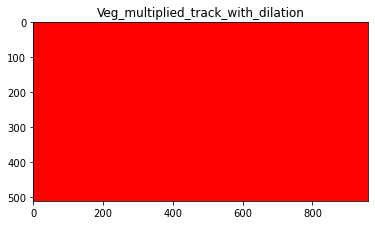

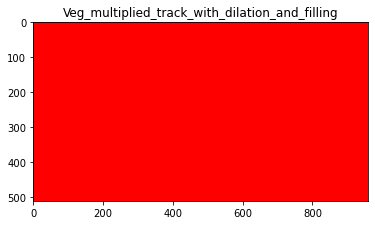

In [236]:
file='rs00039'
post_process(file)

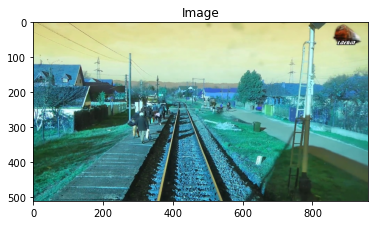

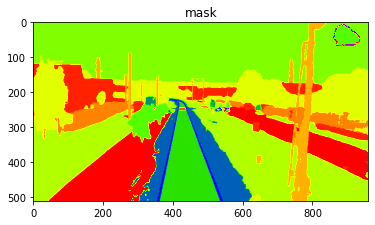

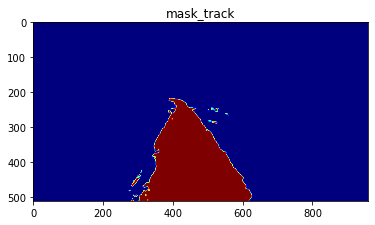

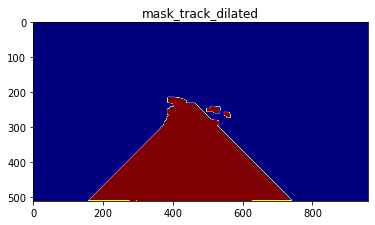

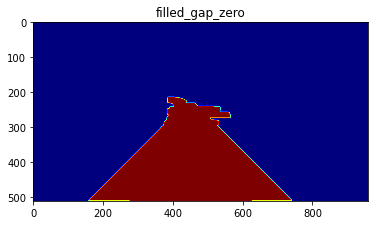

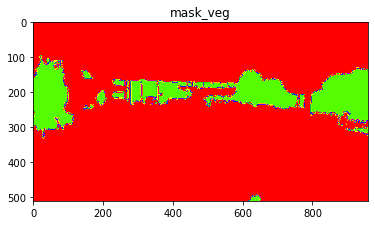

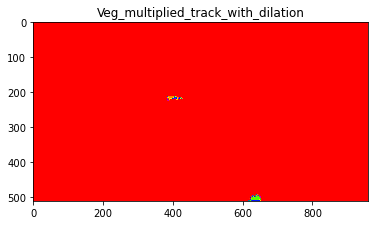

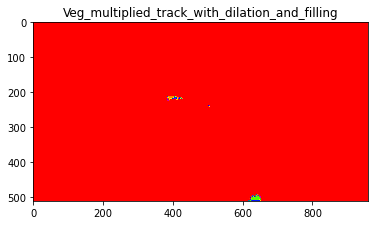

In [237]:
file='rs00713'
post_process(file)

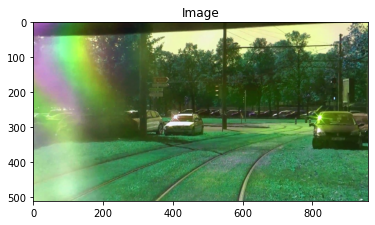

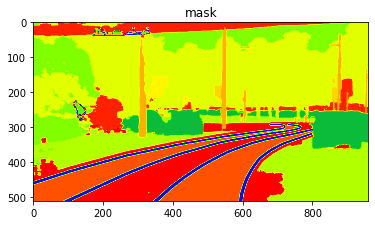

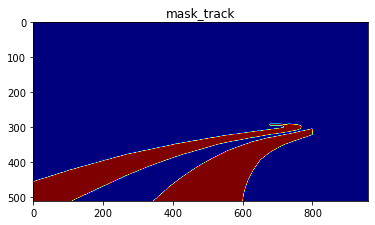

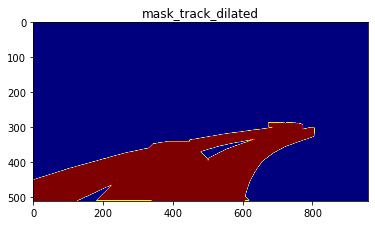

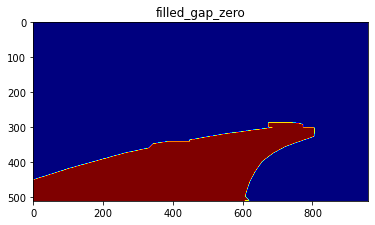

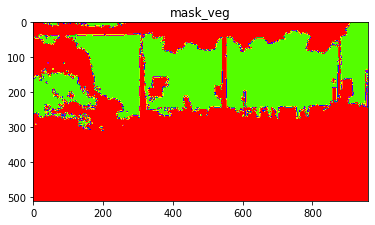

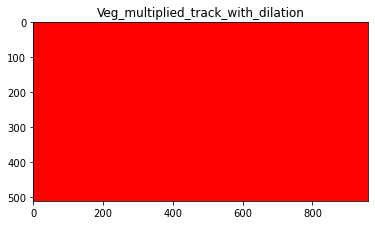

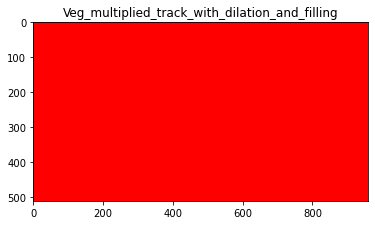

In [238]:
file='rs00600'
post_process(file)

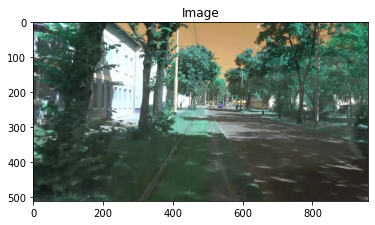

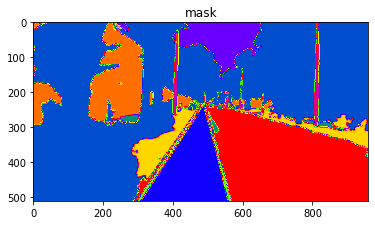

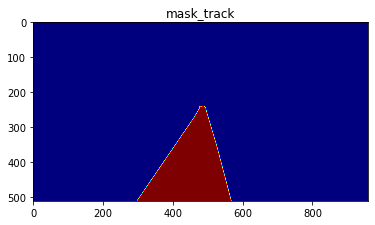

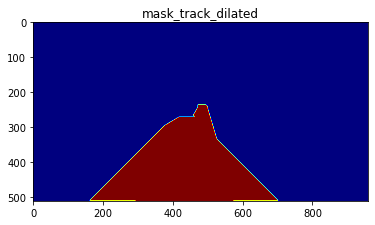

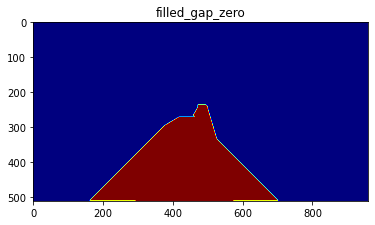

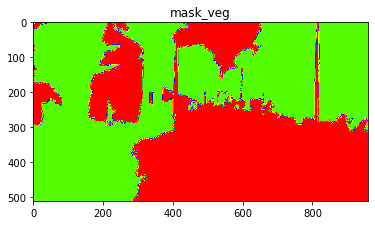

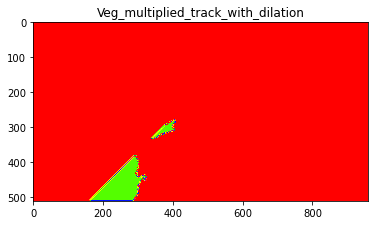

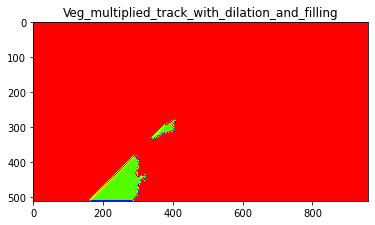

In [239]:
file='rs00230'
post_process(file)

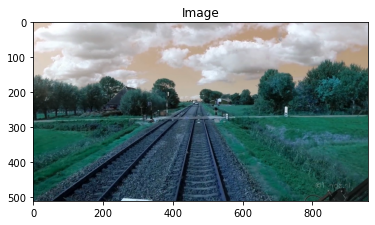

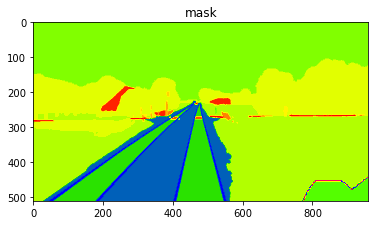

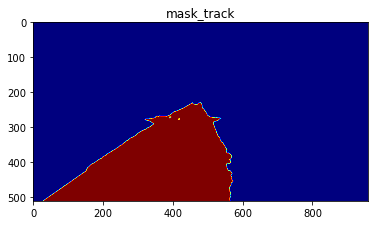

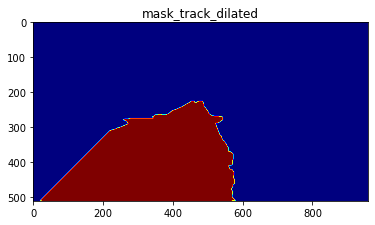

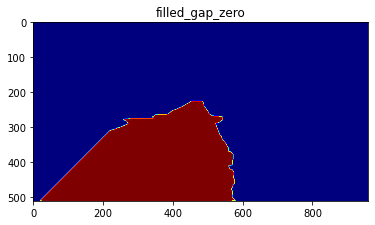

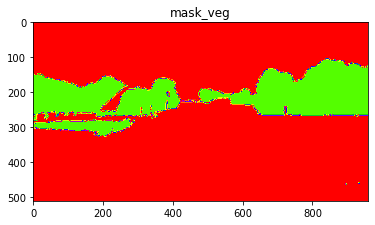

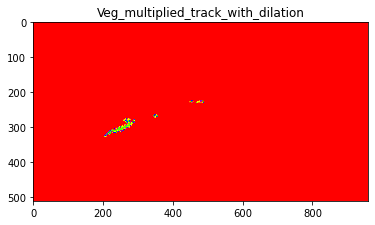

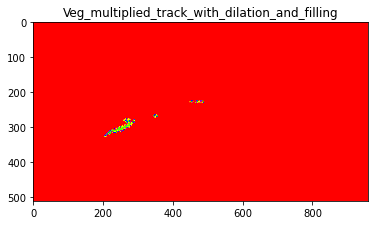

In [242]:
file='rs00140'
post_process(file)

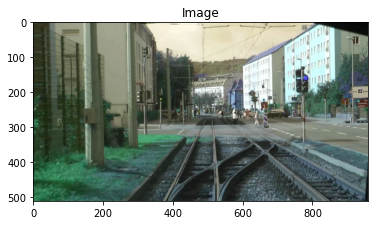

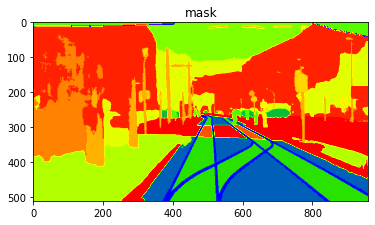

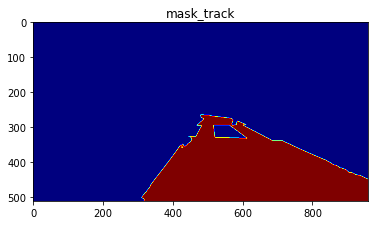

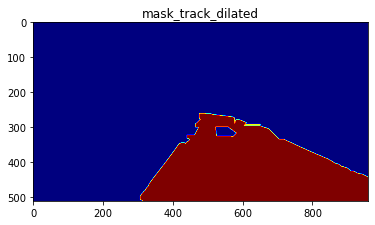

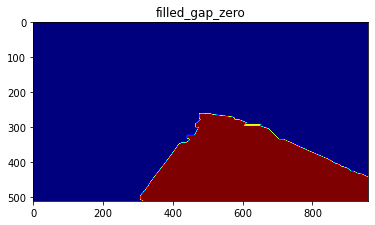

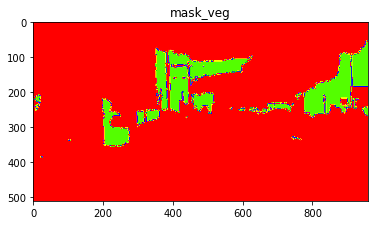

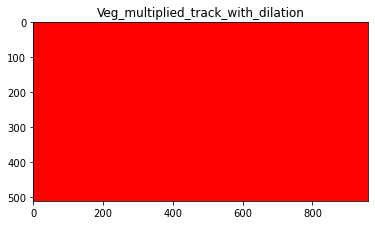

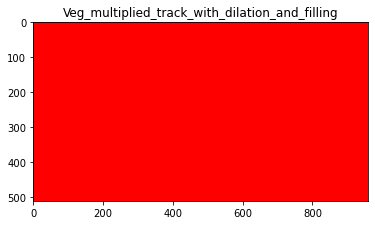

In [243]:
file='rs00136'
post_process(file)

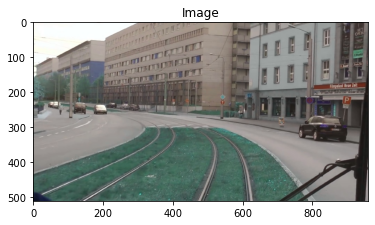

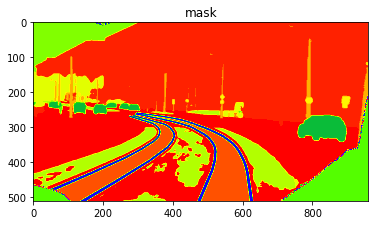

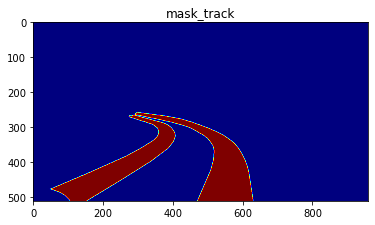

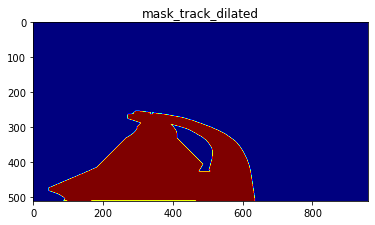

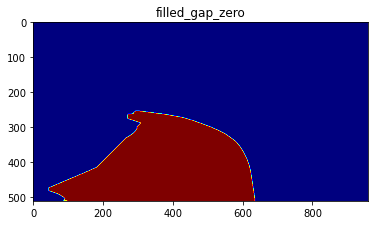

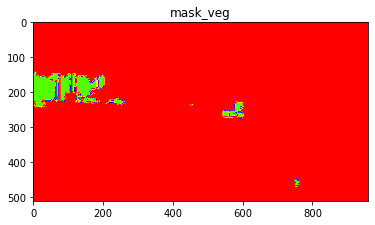

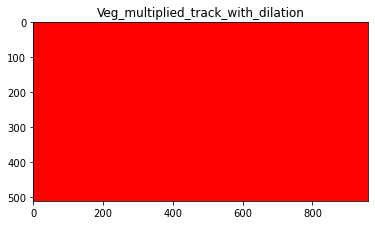

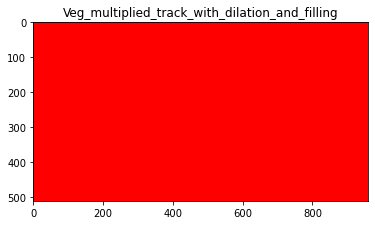

In [244]:
file='rs00320'
post_process(file)

# terrain label

In [261]:
side_walk=1
construction=2
fence =4
terrain= 9
on_rail= 16
veg=8

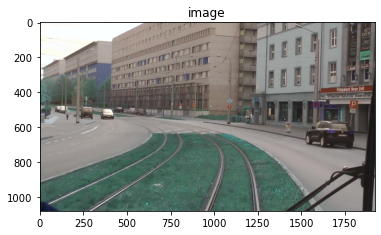

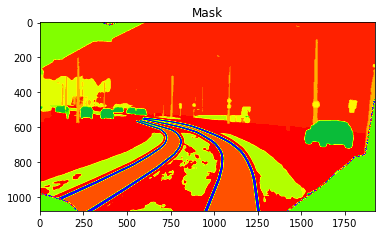

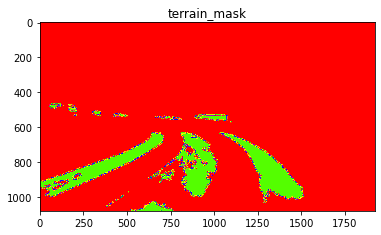

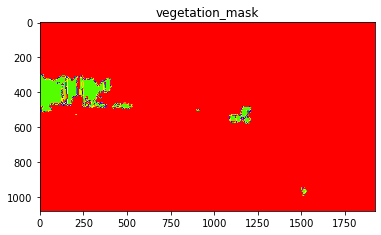

In [262]:
file='rs00320'
i=cv2.imread(path_images_org+file+'.jpg',1)
m= cv2.imread(path_masks_org+file+'.png',0)

plt.imshow(i)
plt.title('image')
plt.show()

plt.imshow(m,cmap='prism')
plt.title('Mask')
plt.show()

m_terrain=m.copy()
m_terrain[m_terrain!=terrain]=0
m_terrain[m_terrain==terrain]=1

plt.imshow(m_terrain,cmap='prism')
plt.title('terrain_mask')
plt.show()


m_vegetation=m.copy()
m_vegetation[m_vegetation!=veg]=0
m_vegetation[m_vegetation==veg]=1

plt.imshow(m_vegetation,cmap='prism')
plt.title('vegetation_mask')
plt.show()

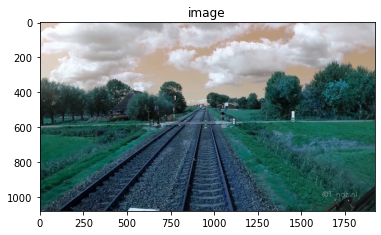

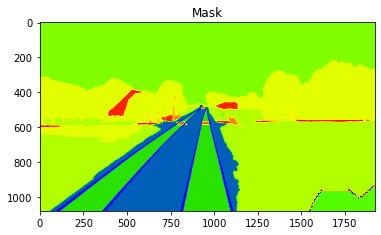

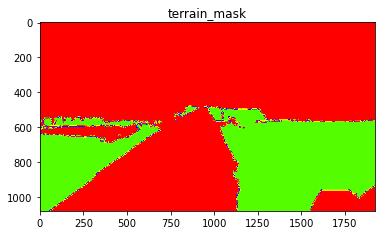

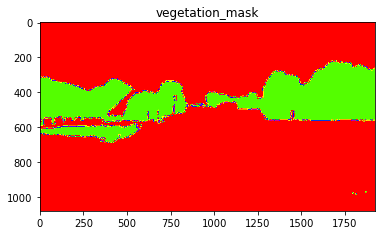

In [263]:
file='rs00140'
#file='rs00320'
i=cv2.imread(path_images_org+file+'.jpg',1)
m= cv2.imread(path_masks_org+file+'.png',0)

plt.imshow(i)
plt.title('image')
plt.show()

plt.imshow(m,cmap='prism')
plt.title('Mask')
plt.show()

m_terrain=m.copy()
m_terrain[m_terrain!=terrain]=0
m_terrain[m_terrain==terrain]=1

plt.imshow(m_terrain,cmap='prism')
plt.title('terrain_mask')
plt.show()


m_vegetation=m.copy()
m_vegetation[m_vegetation!=veg]=0
m_vegetation[m_vegetation==veg]=1

plt.imshow(m_vegetation,cmap='prism')
plt.title('vegetation_mask')
plt.show()

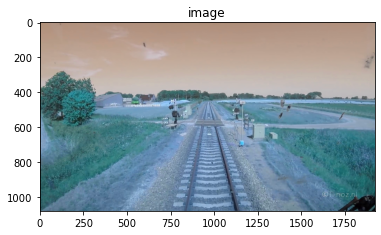

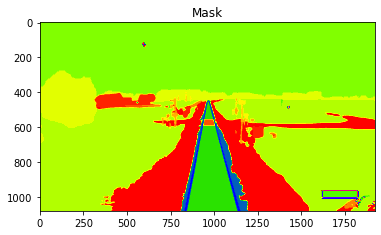

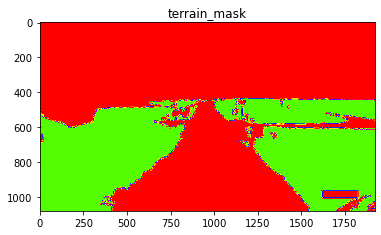

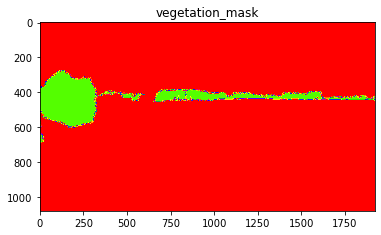

In [264]:
#file='rs00140'
#file='rs00320'
file='rs00321'
i=cv2.imread(path_images_org+file+'.jpg',1)
m= cv2.imread(path_masks_org+file+'.png',0)

plt.imshow(i)
plt.title('image')
plt.show()

plt.imshow(m,cmap='prism')
plt.title('Mask')
plt.show()

m_terrain=m.copy()
m_terrain[m_terrain!=terrain]=0
m_terrain[m_terrain==terrain]=1

plt.imshow(m_terrain,cmap='prism')
plt.title('terrain_mask')
plt.show()


m_vegetation=m.copy()
m_vegetation[m_vegetation!=veg]=0
m_vegetation[m_vegetation==veg]=1

plt.imshow(m_vegetation,cmap='prism')
plt.title('vegetation_mask')
plt.show()

# Refined Code 

# labels

In [265]:
#side_walk=1
#construction=2
#fence =4

#on_rail= 16

terrain= 9

tram_track=3 # label for tram-track
rail_track=12
track_bed= 15
rail_raised= 17
rail_embedded =18
veg = 8


In [266]:
#these codes are used to loop through the directory
#path_images = 'rs19_val/jpgs/rs19_val/'
path_images_org=  'rs19_val/jpgs/rs19_val/'
path_images = 'rs19_val/960_512/images_resized/'
path_masks_org = 'rs19_val/uint8/rs19_val/'
path_masks = 'rs19_val/960_512/masks_resized_track/'

# function to dilate the masks

In [267]:
def dilate_mask(mask_to_be_dilated):
    mask= mask_to_be_dilated.copy()
    initial_kernel = np.ones((10,10), np.uint8)
    img_dilation = cv2.dilate(mask, initial_kernel, iterations=1)

    coord = cv2.findNonZero(mask)
    length = len(coord) - 1 
    coord_width = []
    coord_height = []
    for k in range(length):
        coord_width.append(coord[:][k][0][0])
        coord_height.append(coord[:][k][0][1])
    
    iter = max(coord_height) - min(coord_height)
    highest = min(coord_height)
    highest_1 = min(coord_height) + 1 

    width_mid = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width)
    width_mid = int(width_mid)
    width_mid_1 = ((max(coord_width) - min(coord_width)) / 2) + min(coord_width) + 1 
    width_mid_1 = int(width_mid_1)

    for i in range(iter):
        kernel = np.ones((15+i,15+i), np.uint8)
        img_dilation[highest+i:highest_1+i, width_mid-i:width_mid_1+i] = cv2.dilate(mask[highest+i:highest_1+i, width_mid-i:width_mid_1+i], kernel, iterations=2)

    return img_dilation

# function to fill the gaps (0's if they appear between 1)

In [268]:
def fill_zero_function(arr):
    for i in range(len(arr)):
      # Check if the current element has a previous value of 1 at any previous index
      # or any values after it at any forward index as 1
      if any(arr[:i] == 1) and any(arr[i+1:] == 1):
        # If it does not, replace it with 0
        arr[i] = 1
    return arr

# add terrain label in the post_process code 

In [278]:
def post_process(file):
	image= cv2.imread(path_images+file+'.jpg.jpg',1)
	org_mask=cv2.imread(path_masks_org+file+'.png',0)
	final_mask = cv2.imread(path_masks+file+'.png.png',0)

	down_width = 960
	down_height = 512
	down_points = (down_width, down_height)
	org_mask=cv2.medianBlur(org_mask, 3)
	org_mask=cv2.resize(org_mask, down_points, interpolation= cv2.INTER_NEAREST)
	
	plt.imshow(image)
	plt.title('Image')
	plt.show()

	plt.imshow(org_mask,cmap='prism')
	plt.title('mask')
	plt.show()
	

	plt.imshow(final_mask,cmap='jet')
	plt.title('mask_track')
	plt.show()
	

		
	mask_veg = org_mask.copy()
	mask_veg[mask_veg != veg]=0
	mask_veg[mask_veg== veg]=1
	
	mask_terrain = org_mask.copy()
	mask_terrain[mask_terrain != terrain]=0
	mask_terrain[mask_terrain== terrain]=1



	track_mask_dilated= dilate_mask(final_mask)
	
	#fill_gap_track_dilated= track_mask_dilated.copy()
	#for k,val in enumerate(fill_gap_track_dilated):
	#	fill_gap_track_dilated[k]=forward_fill_ifsame(val)

	fill_zero= track_mask_dilated.copy()
	for k,val in enumerate(fill_zero):
		fill_zero[k]=fill_zero_function(val)
	
	veg_dilated_track= track_mask_dilated*mask_veg
	
	#veg_dilated_track_filled=fill_gap_track_dilated*mask_veg
	veg_dilated_track_filled=fill_zero*mask_veg

	# veg_terrain_track multiplied without preprocessing
	terrain_trackdilatedfilled=track_mask_dilated * mask_terrain
	
	plt.imshow(track_mask_dilated,cmap='jet')
	plt.title('mask_track_dilated')
	plt.show()

		
	plt.imshow(fill_zero,cmap='jet')
	plt.title('filled_gap_zero_in dilated track mask')
	plt.show()
	
	
	plt.imshow(mask_veg,cmap='prism')
	plt.title('mask_veg')
	plt.show()

	plt.imshow(mask_terrain,cmap='prism')
	plt.title('mask_terrain')
	plt.show()
	
	plt.imshow(veg_dilated_track,cmap='prism')
	plt.title('Veg_multiplied_track_with_dilation')
	plt.show()
	
	plt.imshow(veg_dilated_track_filled,cmap='prism')
	plt.title('Veg_multiplied_track_with_dilation_and_filling')
	plt.show()

	plt.imshow(terrain_trackdilatedfilled,cmap='prism')
	plt.title('terrain_track (dilated and filled) multiplied')
	plt.show()

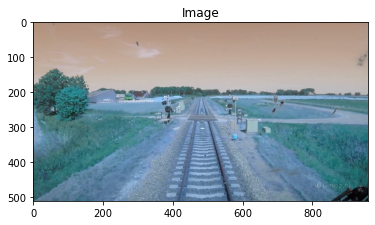

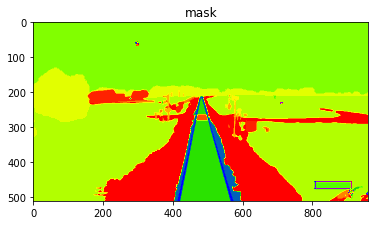

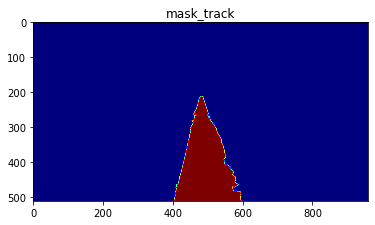

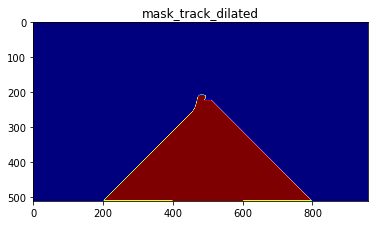

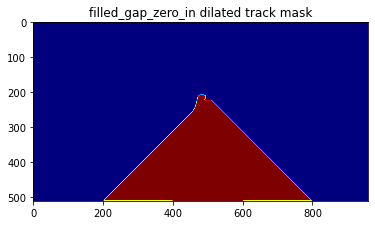

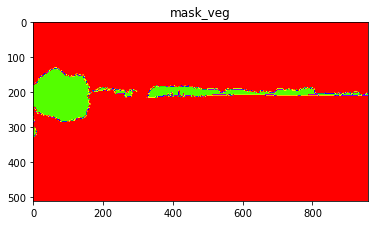

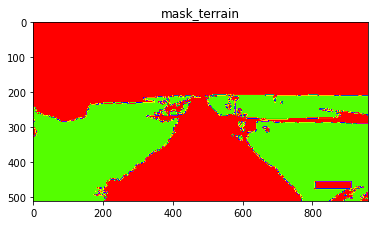

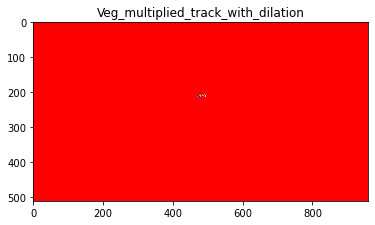

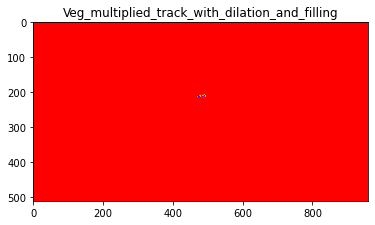

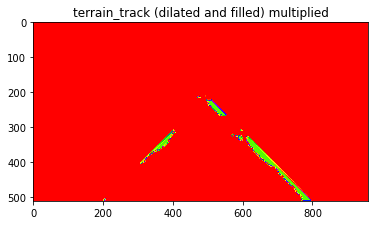

In [279]:
file='rs00321'
post_process(file)

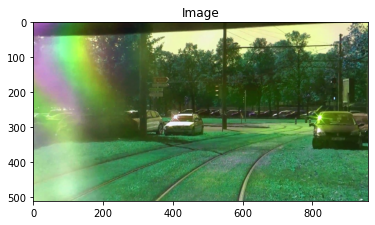

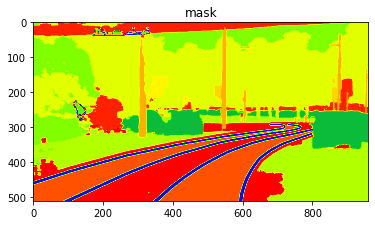

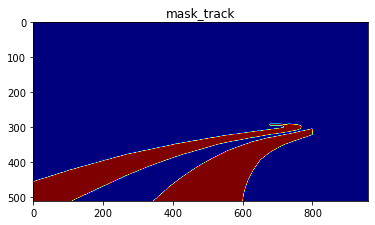

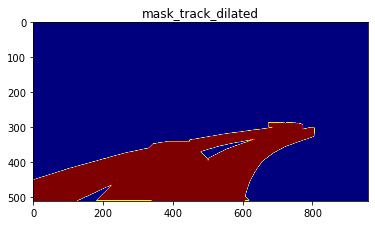

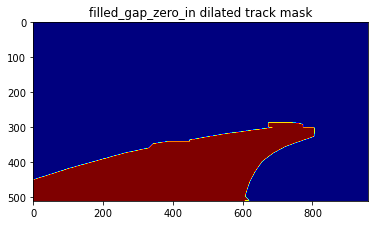

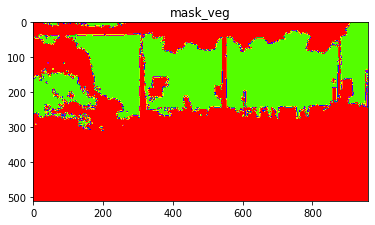

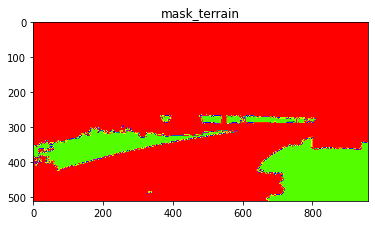

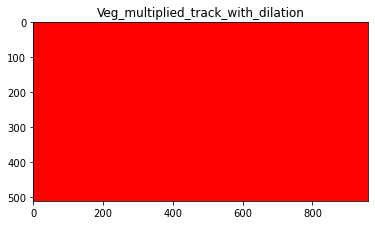

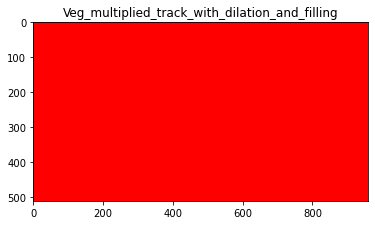

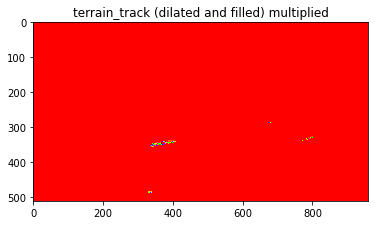

In [280]:
file='rs00600'
post_process(file)